In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#  Data Preparation

df = pd.read_csv('process_dataset.csv')

X = df.drop('remainder__satisfaction_encoded', axis=1)
y = df['remainder__satisfaction_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 DEFAULT KNN
Accuracy  : 0.9189
F1 Score  : 0.9081
Precision : 0.9408
Recall    : 0.8775
AUC       : 0.9641


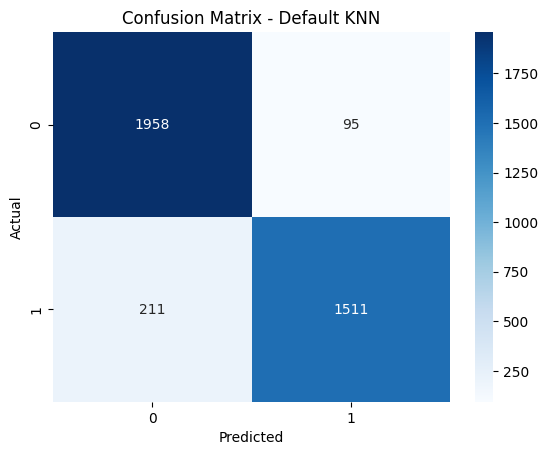

In [4]:
#  Model 1: Default KNN

print(" DEFAULT KNN")


default_knn = KNeighborsClassifier()
default_knn.fit(X_train_scaled, y_train)
y_pred_default = default_knn.predict(X_test_scaled)
y_proba_default = default_knn.predict_proba(X_test_scaled)[:, 1]

# Metrics
acc_d = accuracy_score(y_test, y_pred_default)
f1_d = f1_score(y_test, y_pred_default)
prec_d = precision_score(y_test, y_pred_default)
recall_d = recall_score(y_test, y_pred_default)
auc_d = roc_auc_score(y_test, y_proba_default)

print(f"Accuracy  : {acc_d:.4f}")
print(f"F1 Score  : {f1_d:.4f}")
print(f"Precision : {prec_d:.4f}")
print(f"Recall    : {recall_d:.4f}")
print(f"AUC       : {auc_d:.4f}")

cm_default = confusion_matrix(y_test, y_pred_default)
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Default KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 MANUAL PARAMETER TUNING

Manual Tuning Results:
                                          Parameters  Accuracy  F1 Score  \
0  {'n_neighbors': 3, 'weights': 'uniform', 'metr...  0.913642  0.902570   
1  {'n_neighbors': 5, 'weights': 'distance', 'met...  0.918146  0.907291   
2  {'n_neighbors': 7, 'weights': 'uniform', 'metr...  0.925563  0.916691   

   Precision    Recall       AUC  
0   0.929803  0.876887  0.953500  
1   0.938547  0.878049  0.965225  
2   0.936402  0.897793  0.975231  
 Best Manual Parameters: {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'manhattan'}


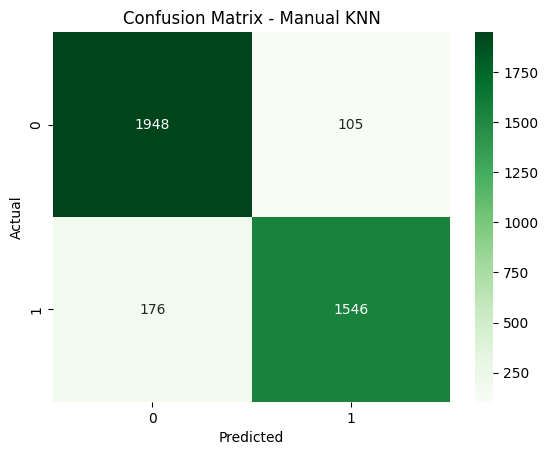

In [5]:
#  Manual Parameter Tuning (3 varieties)


print(" MANUAL PARAMETER TUNING")


manual_params = [
    {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'minkowski'},
    {'n_neighbors': 5, 'weights': 'distance', 'metric': 'minkowski'},
    {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'manhattan'}
]

results_manual = []

for params in manual_params:
    model = KNeighborsClassifier(**params)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results_manual.append({
        'Parameters': params,
        'Accuracy': acc,
        'F1 Score': f1,
        'Precision': prec,
        'Recall': rec,
        'AUC': auc
    })

manual_df = pd.DataFrame(results_manual)
print("\nManual Tuning Results:")
print(manual_df)

# Pick best manual model
best_manual = results_manual[np.argmax([r['Accuracy'] for r in results_manual])]
print(" Best Manual Parameters:", best_manual['Parameters'])

# Confusion Matrix for Best Manual
best_manual_model = KNeighborsClassifier(**best_manual['Parameters'])
best_manual_model.fit(X_train_scaled, y_train)
y_pred_manual = best_manual_model.predict(X_test_scaled)
y_proba_manual = best_manual_model.predict_proba(X_test_scaled)[:, 1]

cm_manual = confusion_matrix(y_test, y_pred_manual)
sns.heatmap(cm_manual, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Manual KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 GRIDSEARCHCV KNN

 Best Parameters (GridSearchCV): {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
 Best CV Accuracy: 0.9156

GridSearchCV Evaluation:
Accuracy  : 0.9256
F1 Score  : 0.9167
Precision : 0.9364
Recall    : 0.8978
AUC       : 0.9752


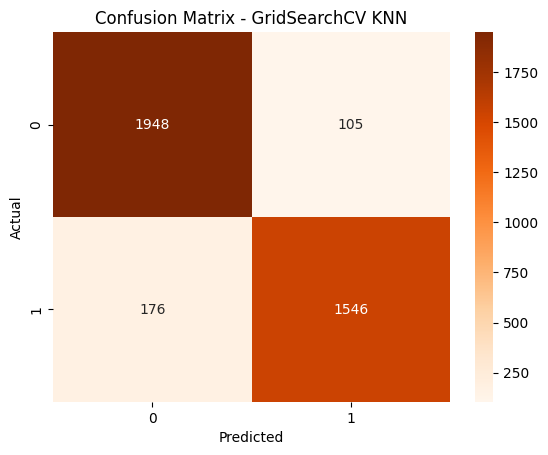

In [7]:
#  GridSearchCV Tuning

print(" GRIDSEARCHCV KNN")


param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("\n Best Parameters (GridSearchCV):", grid_search.best_params_)
print(f" Best CV Accuracy: {grid_search.best_score_:.4f}")

best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)
y_proba_grid = best_grid_model.predict_proba(X_test_scaled)[:, 1]

acc_g = accuracy_score(y_test, y_pred_grid)
f1_g = f1_score(y_test, y_pred_grid)
prec_g = precision_score(y_test, y_pred_grid)
recall_g = recall_score(y_test, y_pred_grid)
auc_g = roc_auc_score(y_test, y_proba_grid)

print("\nGridSearchCV Evaluation:")
print(f"Accuracy  : {acc_g:.4f}")
print(f"F1 Score  : {f1_g:.4f}")
print(f"Precision : {prec_g:.4f}")
print(f"Recall    : {recall_g:.4f}")
print(f"AUC       : {auc_g:.4f}")

cm_grid = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(cm_grid, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - GridSearchCV KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
# Comparison Table

comparison = pd.DataFrame({
    'Model': ['Default KNN', 'Best Manual KNN', 'GridSearchCV KNN'],
    'Accuracy': [acc_d, best_manual['Accuracy'], acc_g],
    'F1 Score': [f1_d, best_manual['F1 Score'], f1_g],
    'Precision': [prec_d, best_manual['Precision'], prec_g],
    'Recall': [recall_d, best_manual['Recall'], recall_g],
    'AUC': [auc_d, best_manual['AUC'], auc_g]
})

print(" MODEL COMPARISON TABLE")

print(comparison)



 MODEL COMPARISON TABLE
              Model  Accuracy  F1 Score  Precision    Recall       AUC
0       Default KNN  0.918940  0.908053   0.940847  0.877468  0.964063
1   Best Manual KNN  0.925563  0.916691   0.936402  0.897793  0.975231
2  GridSearchCV KNN  0.925563  0.916691   0.936402  0.897793  0.975231
